In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.3 MB/s eta 0:00:00


# **Libraries.**

In [ ]:
#==============================================================
# 1. Data Manipulation Libraries
# ==============================================================
import numpy as np
import pandas as pd
import os

# ==============================================================
# 2. Data Visualization Libraries
# ==============================================================
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# ==============================================================
# 3. Data Preprocessing and Analysis
# ==============================================================
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import optuna
from sklearn.metrics import accuracy_score, fbeta_score, f1_score, recall_score, precision_score

# ==============================================================
# 4. Machine Learning - Models and Evaluation
# ==============================================================
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# Data splitting
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Evaluation metrics
from sklearn.metrics import accuracy_score, fbeta_score, r2_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# ==============================================================
# 5. Utility Libraries
# ==============================================================
from contextlib import redirect_stdout
import logging
import warnings
from tqdm import tqdm

# **Path of Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data set of cancer./breast-cancerdataset.csv') #this is path of our data set from google drive.

# **Data visualization**

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.columns  #

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.describe( include= 'all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


# **Data exploring.**

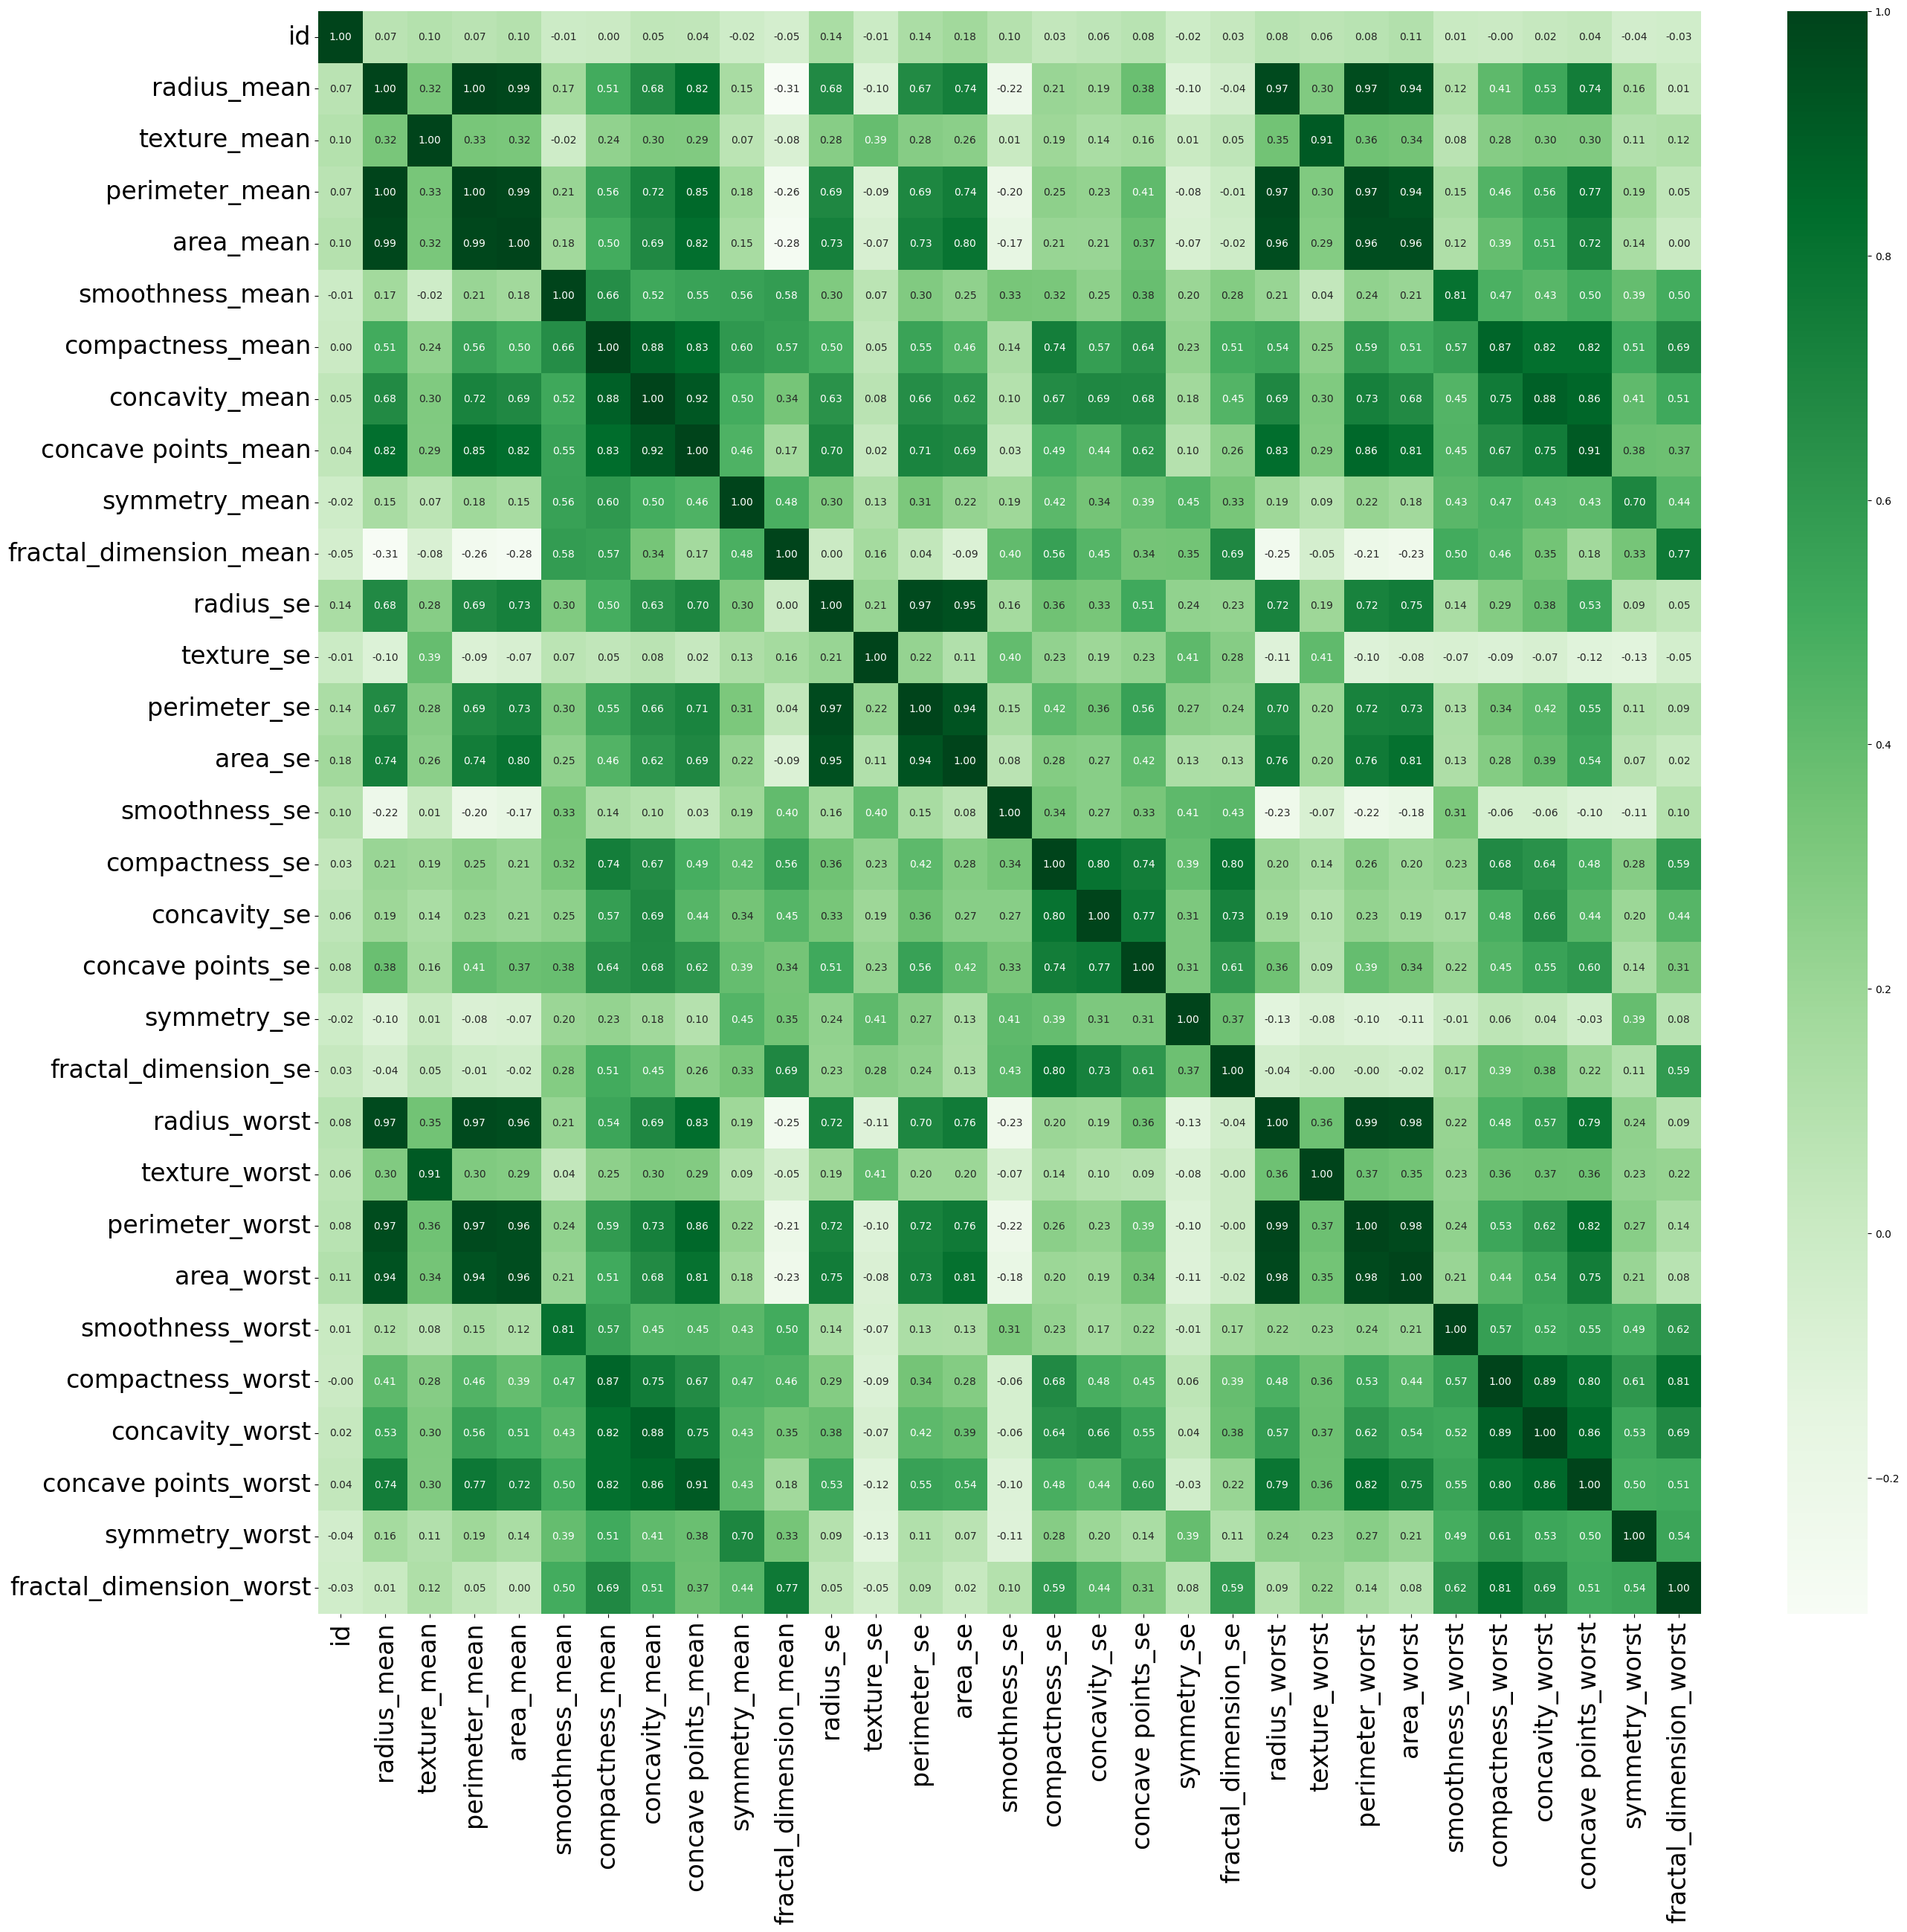

In [ ]:
mt = df.select_dtypes(include='number').corr()
corr_matrix = mt
plt.figure(figsize=(30, 28))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt= '.2f')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

In [ ]:
x_values = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# **Plots exploring.**

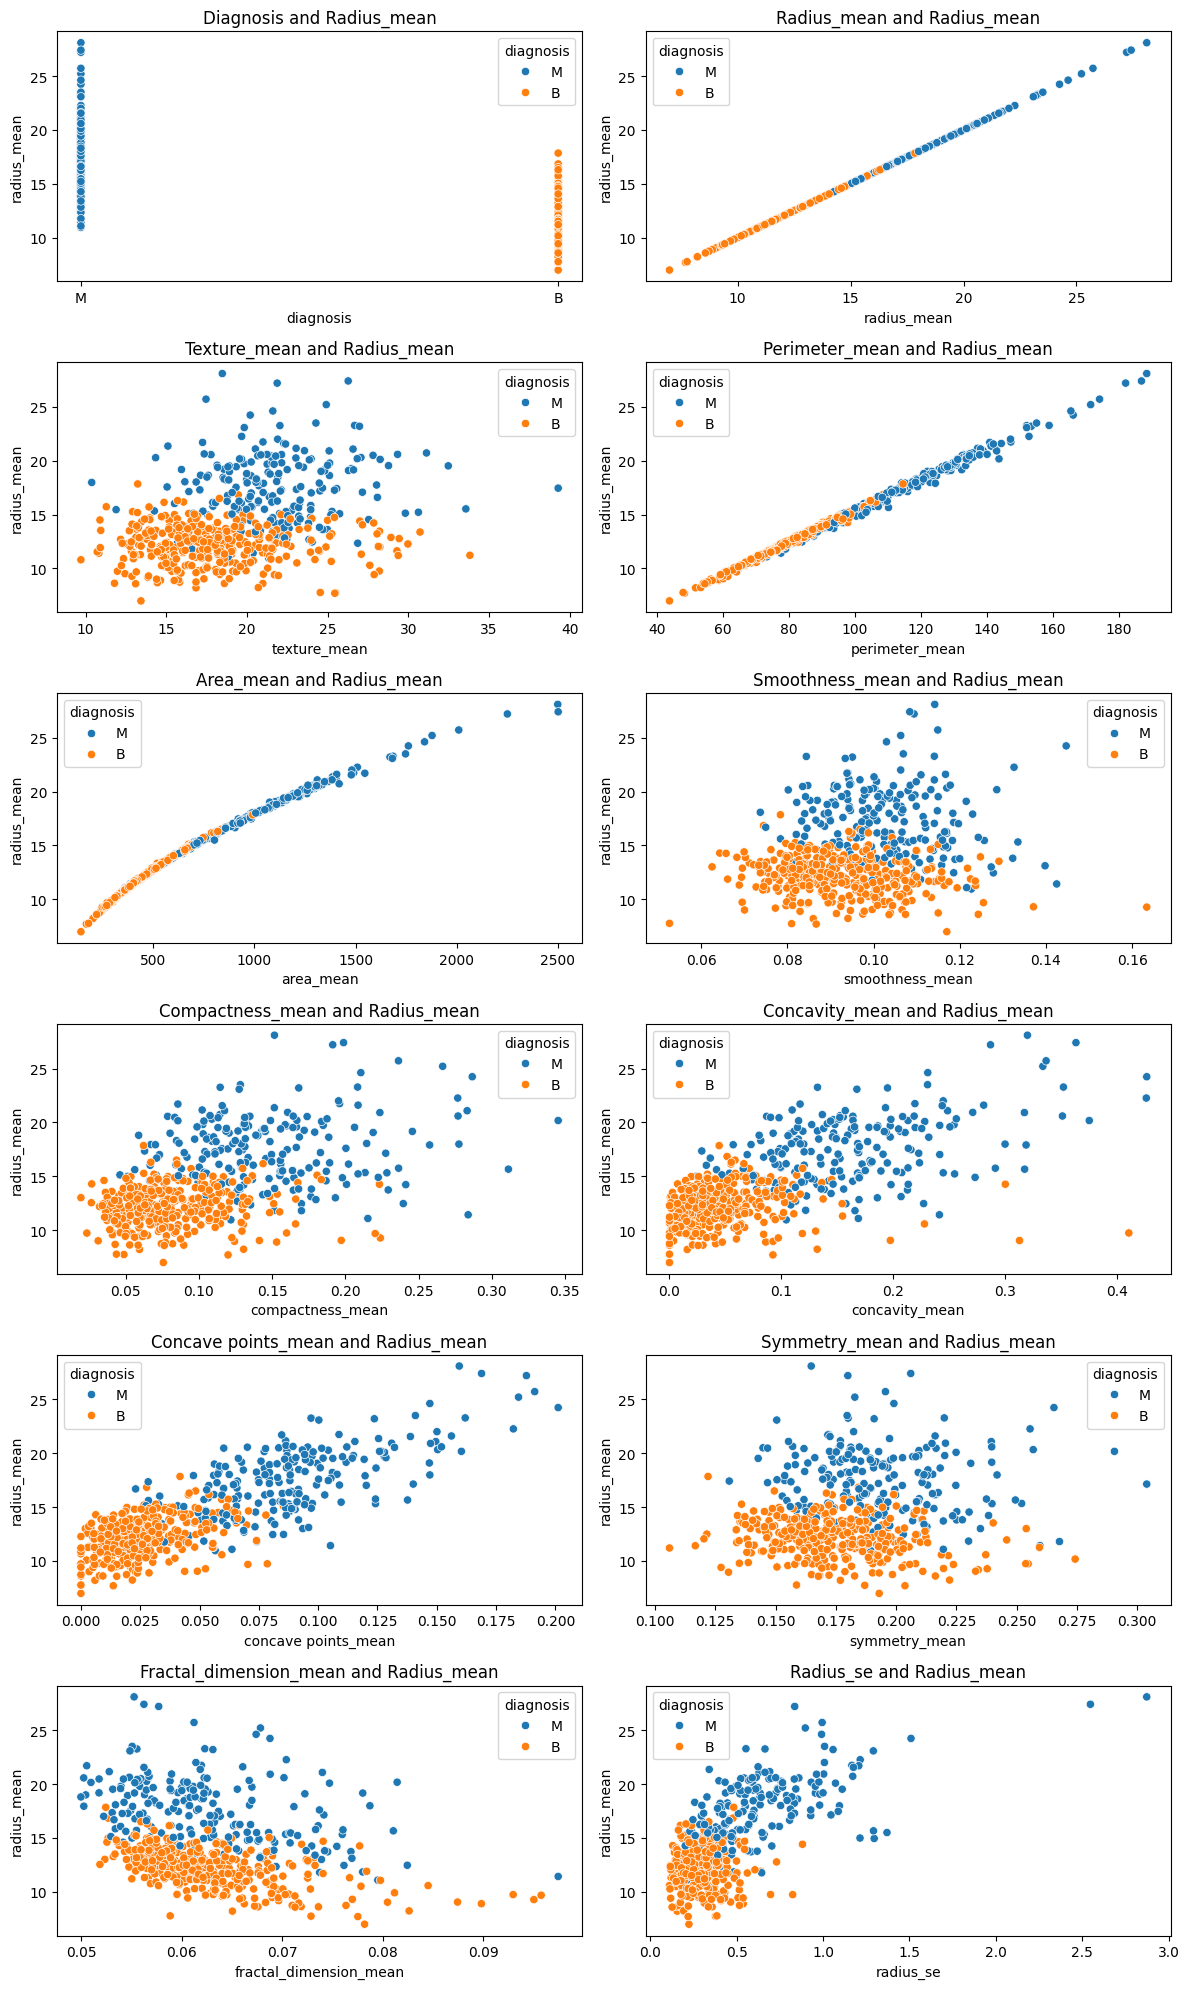

In [ ]:
fig, axis = plt.subplots(nrows=6, ncols=2, figsize=(12, 20))
y_value = 'radius_mean'

for ax, x_value in zip(axis.flat, x_values):
    sns.scatterplot(data=df, x=x_value, y=y_value, hue='diagnosis', ax=ax)
    ax.set_title(f'{x_value.capitalize()} and {y_value.capitalize()}')

plt.tight_layout()
plt.show()


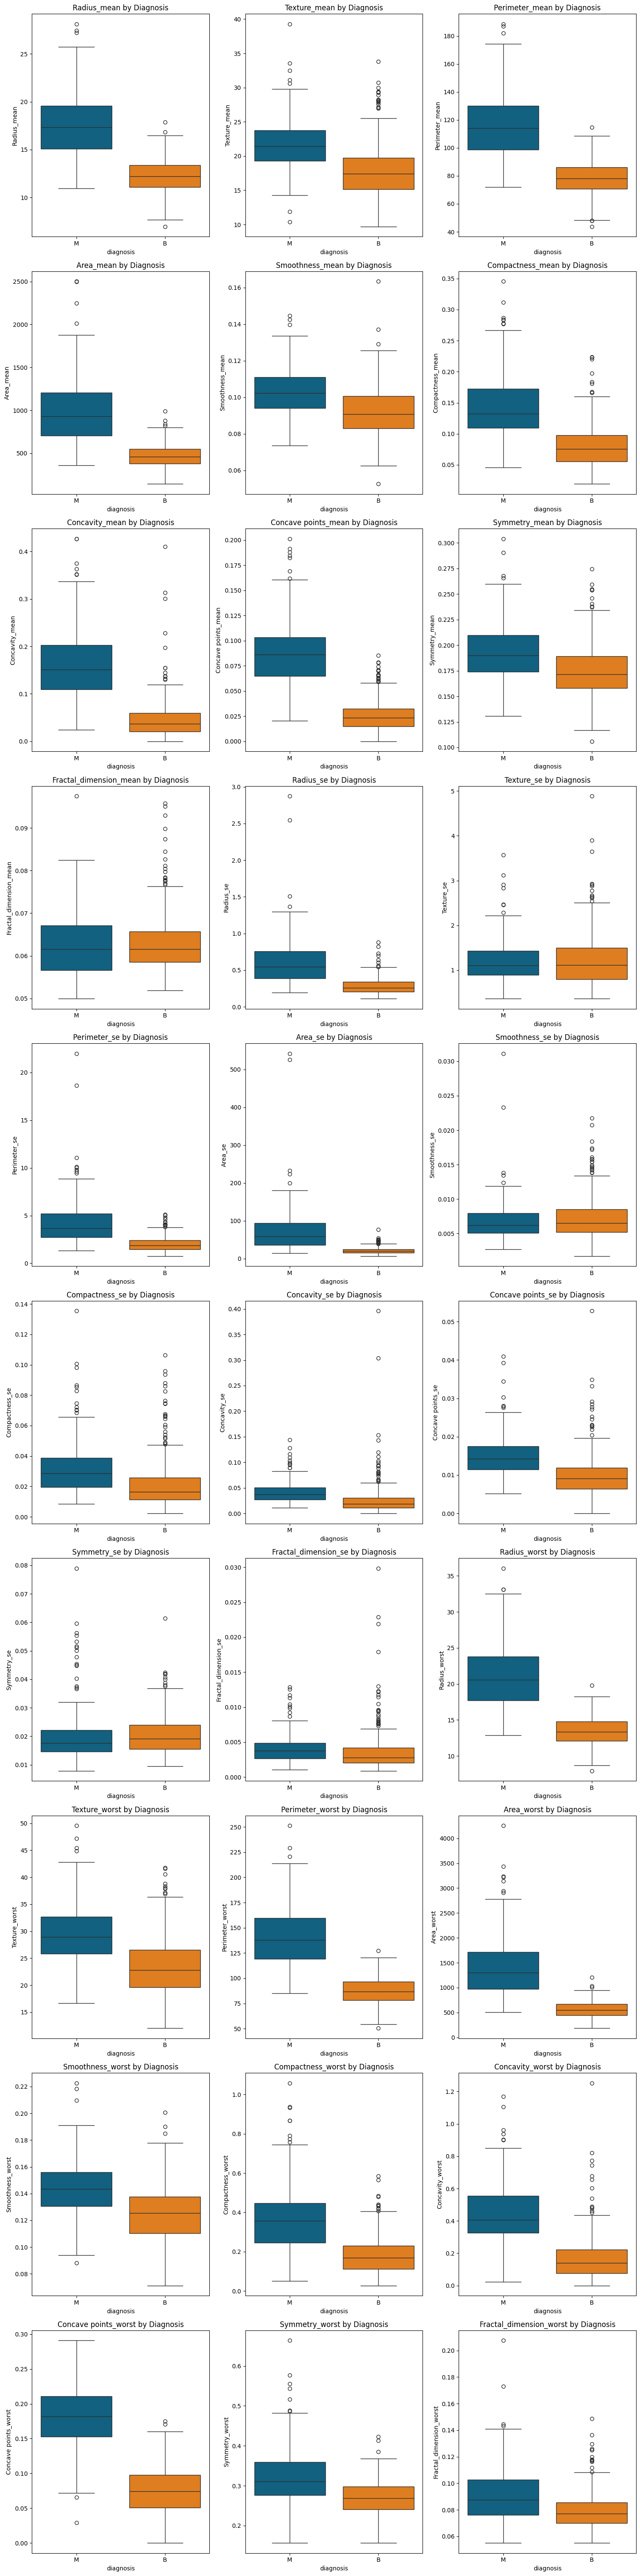

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 60))

x_values = [col for col in x_values if col != 'diagnosis']
y_value = 'radius_mean'

for i, x_value in enumerate(x_values):
    ax = axes.flatten()[i]
    sns.boxplot(data=df, x='diagnosis', y=x_value, hue='diagnosis', ax=ax,palette=["#006992", "#ff7d00"])
    ax.set_title(f'{x_value.capitalize()} by Diagnosis')
    ax.set_ylabel(x_value.capitalize())


plt.tight_layout()
plt.show()

# **Data Processing.**

In [ ]:
df = df.drop('id', axis = 1)
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [ ]:
def remove_outliers(df):
    cleaned_df = df.copy()
    for col in cleaned_df.columns:
        if cleaned_df[col].dtype in ['float64', 'int64']:

            Q1 = cleaned_df[col].quantile(0.25)
            Q3 = cleaned_df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR

            cleaned_df[col] = cleaned_df[col].apply(
                lambda x: x if pd.isnull(x) or (lower_limit <= x <= upper_limit) else None
            )

    return cleaned_df

df = remove_outliers(df)
percent_nulos = df.isnull().mean() * 100
print(percent_nulos)


diagnosis                   0.000000
radius_mean                 2.460457
texture_mean                1.230228
perimeter_mean              2.284710
area_mean                   4.393673
smoothness_mean             1.054482
compactness_mean            2.811951
concavity_mean              3.163445
concave points_mean         1.757469
symmetry_mean               2.636204
fractal_dimension_mean      2.636204
radius_se                   6.678383
texture_se                  3.514938
perimeter_se                6.678383
area_se                    11.423550
smoothness_se               5.272408
compactness_se              4.920914
concavity_se                3.866432
concave points_se           3.339192
symmetry_se                 4.745167
fractal_dimension_se        4.920914
radius_worst                2.987698
texture_worst               0.878735
perimeter_worst             2.636204
area_worst                  6.151142
smoothness_worst            1.230228
compactness_worst           2.811951
c

In [ ]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].mean())
    return df

df = fill_missing_values(df)

# **Data splitting.**

In [ ]:
numerical_cols = df.select_dtypes(include ='number').columns
categorical_cols = df.select_dtypes(exclude ='number').columns

In [ ]:
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
X = df_dummies.drop('diagnosis_M', axis=1)
y = df_dummies['diagnosis_M']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
y_res = label_encoder.fit_transform(y_res)

In [ ]:
label_encoder = LabelEncoder()
y_res = label_encoder.fit_transform(y_res)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# **SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
y_res = label_encoder.fit_transform(y_res)

# **Optuna Hyperparameter Optimization.**

In [ ]:
label_encoder = LabelEncoder()
y_res = label_encoder.fit_transform(y_res)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
def objective(trial, model_name):
    if model_name == 'KNN':
        n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
        p = trial.suggest_int('p', 1, 2)
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

    elif model_name == 'LogisticRegression':
        C = trial.suggest_float('C', 0.01, 10.0)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
        model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', max_iter=1000)

    elif model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)

    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

    else:
        raise ValueError("Incompatibility Error")


    with open(os.devnull, 'w') as fnull:
        with redirect_stdout(fnull):
            model.fit(X_res, y_res)

            #make predection on data set.
            y_pred = model.predict(X_test)

    f2_score = fbeta_score(y_test, y_pred, beta=2, average='macro')

    return f2_score

In [ ]:
models = ['KNN', 'LogisticRegression', 'RandomForest', 'XGBoost']
best_params = {}

In [ ]:
for model_name in models:
    study = optuna.create_study(direction='maximize')
    with tqdm(total=50, desc=f'Optimization... {model_name}', dynamic_ncols=True) as pbar:
        def callback(study, trial):
            pbar.update(1)


        study.optimize(lambda trial: objective(trial, model_name), n_trials=50, callbacks=[callback])
    best_params[model_name] = study.best_params

    print(f"Best parameters for {model_name}: {study.best_params}")
    print(f"Best F2 Score for {model_name}: {study.best_value}\n")

print("Best parameters for all models:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

[I 2025-02-13 04:25:40,337] A new study created in memory with name: no-name-1c188bdc-ec52-4933-a994-de81208d8087
Optimization... KNN:   0%|          | 0/50 [00:00<?, ?it/s][I 2025-02-13 04:25:40,368] Trial 0 finished with value: 0.9518402814239211 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.9518402814239211.
[I 2025-02-13 04:25:40,385] Trial 1 finished with value: 0.9626596790042581 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.9626596790042581.
[I 2025-02-13 04:25:40,402] Trial 2 finished with value: 0.9299567829661642 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.9626596790042581.
[I 2025-02-13 04:25:40,416] Trial 3 finished with value: 0.9253193580085162 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.9626596790042581.
[I 2025-02-13 04:25:40,434] Trial 4 finished with value: 0.970544

Best parameters for KNN: {'n_neighbors': 11, 'weights': 'uniform', 'p': 1}
Best F2 Score for KNN: 0.9705449963246876



Optimization... LogisticRegression:   8%|▊         | 4/50 [00:00<00:07,  6.22it/s][I 2025-02-13 04:25:42,693] Trial 4 finished with value: 0.9705449963246876 and parameters: {'C': 0.13808741917357345, 'penalty': 'l1'}. Best is trial 0 with value: 0.9705449963246876.
[I 2025-02-13 04:25:42,710] Trial 5 finished with value: 0.9596796465064898 and parameters: {'C': 2.4329314144571823, 'penalty': 'l2'}. Best is trial 0 with value: 0.9705449963246876.
[I 2025-02-13 04:25:42,729] Trial 6 finished with value: 0.9596796465064898 and parameters: {'C': 1.076986997551732, 'penalty': 'l2'}. Best is trial 0 with value: 0.9705449963246876.
[I 2025-02-13 04:25:42,930] Trial 7 finished with value: 0.9596796465064898 and parameters: {'C': 5.203387031538542, 'penalty': 'l1'}. Best is trial 0 with value: 0.9705449963246876.
Optimization... LogisticRegression:  20%|██        | 10/50 [00:01<00:04,  8.08it/s][I 2025-02-13 04:25:43,268] Trial 10 finished with value: 0.9596796465064898 and parameters: {'C': 8

Best parameters for LogisticRegression: {'C': 9.972269671601616, 'penalty': 'l1'}
Best F2 Score for LogisticRegression: 0.9705449963246876



Optimization... RandomForest:  22%|██▏       | 11/50 [00:04<00:12,  3.13it/s][I 2025-02-13 04:25:51,880] Trial 11 finished with value: 0.9733992467043314 and parameters: {'n_estimators': 17, 'max_depth': 32, 'min_samples_split': 4}. Best is trial 10 with value: 0.981329839502129.
[I 2025-02-13 04:25:51,935] Trial 12 finished with value: 0.9626596790042581 and parameters: {'n_estimators': 10, 'max_depth': 29, 'min_samples_split': 4}. Best is trial 10 with value: 0.981329839502129.
Optimization... RandomForest:  82%|████████▏ | 41/50 [00:11<00:02,  3.85it/s][I 2025-02-13 04:25:59,033] Trial 41 finished with value: 0.981329839502129 and parameters: {'n_estimators': 15, 'max_depth': 32, 'min_samples_split': 4}. Best is trial 10 with value: 0.981329839502129.
[I 2025-02-13 04:25:59,135] Trial 42 finished with value: 0.9518402814239211 and parameters: {'n_estimators': 20, 'max_depth': 29, 'min_samples_split': 4}. Best is trial 10 with value: 0.981329839502129.
Optimization... RandomForest:  

Best parameters for RandomForest: {'n_estimators': 30, 'max_depth': 32, 'min_samples_split': 4}
Best F2 Score for RandomForest: 0.981329839502129



Optimization... XGBoost: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]

Best parameters for XGBoost: {'n_estimators': 191, 'max_depth': 29, 'learning_rate': 0.11929133273291537}
Best F2 Score for XGBoost: 0.9626596790042581

Best parameters for all models:
KNN: {'n_neighbors': 11, 'weights': 'uniform', 'p': 1}
LogisticRegression: {'C': 9.972269671601616, 'penalty': 'l1'}
RandomForest: {'n_estimators': 30, 'max_depth': 32, 'min_samples_split': 4}
XGBoost: {'n_estimators': 191, 'max_depth': 29, 'learning_rate': 0.11929133273291537}


# **Machine Learning**
# Random forest.


In [ ]:
rf_model = RandomForestClassifier(n_estimators= 45, max_depth= 24, min_samples_split= 5)
rf_model.fit(X_res, y_res)
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred)
f2_rf = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')

cm_rf = confusion_matrix(y_test, y_pred)

# KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 12, weights='uniform', p = 1)
knn_model.fit(X_res, y_res)
y_pred = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
f2_knn = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')
recall_knn = recall_score(y_test, y_pred, average='macro')

cm_knn = confusion_matrix(y_test, y_pred)

# XGB

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators= 30, max_depth= 5, learning_rate= 0.019089155207461007)
xgb_classifier.fit(X_res, y_res)
y_pred = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
f2_xgb = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_xgb = f1_score(y_test, y_pred, average='macro')
recall_xgb = recall_score(y_test, y_pred, average='macro')

cm_xgb = confusion_matrix(y_test, y_pred)

# LogisticRegression.

In [ ]:
logreg_classifier = LogisticRegression(C= 3.5695690341247963, penalty='l1', solver='liblinear')
logreg_classifier.fit(X_res, y_res)
y_pred = logreg_classifier.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred)
f2_lg = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_lg = f1_score(y_test, y_pred, average='macro')
recall_lg = recall_score(y_test, y_pred, average='macro')

cm_lg = confusion_matrix(y_test, y_pred)

# Conclusion

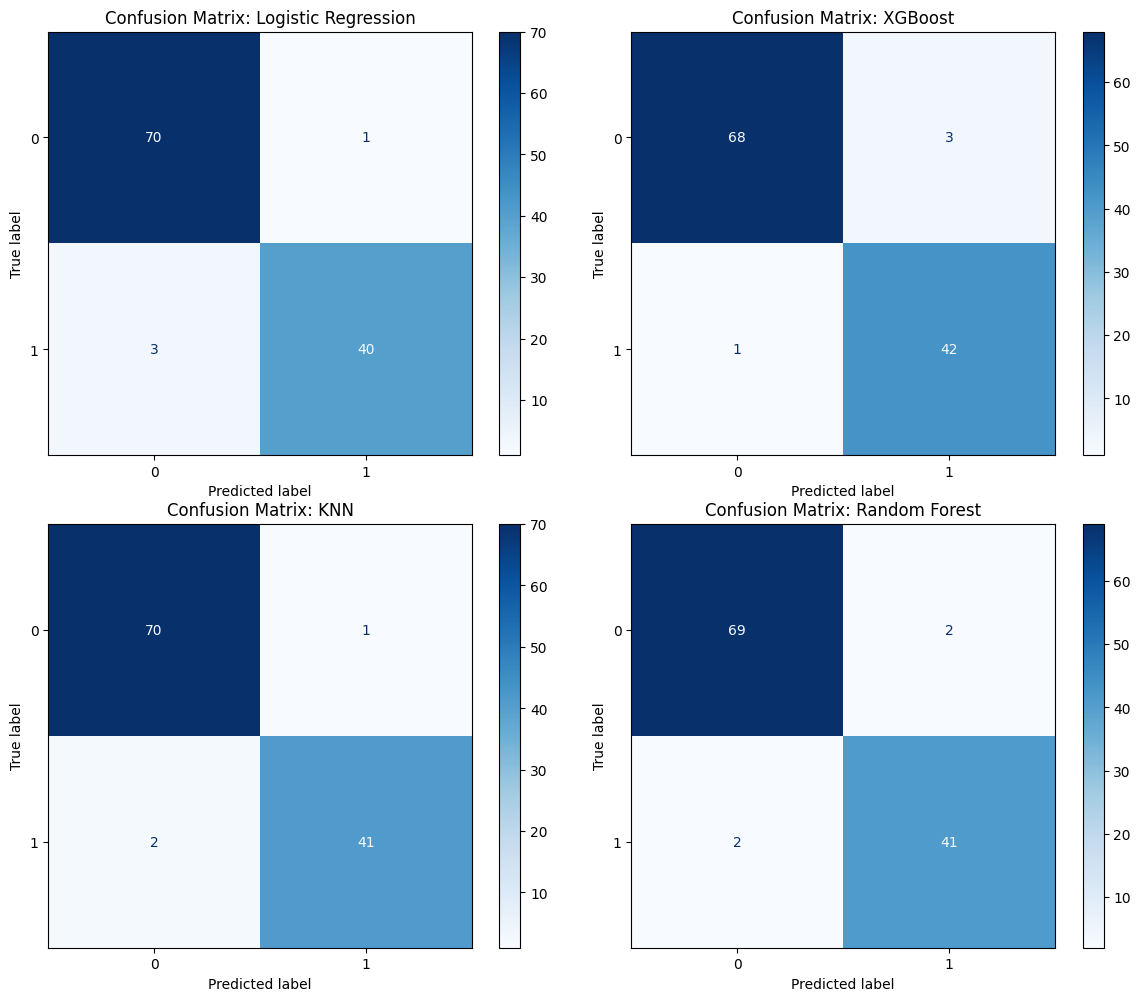

In [ ]:
cm_list = [cm_lg, cm_xgb, cm_knn, cm_rf]
model_names = ['Logistic Regression', 'XGBoost', 'KNN', 'Random Forest']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for ax, cm, name in zip(axes.flat, cm_list, model_names):

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix: {name}')

plt.tight_layout()
plt.show()

In [ ]:
model_results = [
    {'model': 'LinearRegression', 'accuracy': accuracy_lg, 'f2_score': f2_lg, 'f1_score': f1_lg, 'recall': recall_lg},
    {'model': 'RandomForestClassifier', 'accuracy': accuracy_rf, 'f2_score': f2_rf, 'f1_score': f1_rf, 'recall': recall_rf},
    {'model': 'KNeighborsClassifier', 'accuracy': accuracy_knn, 'f2_score': f2_knn, 'f1_score': f1_knn, 'recall': recall_knn},
    {'model': 'XGBClassifier', 'accuracy': accuracy_xgb, 'f2_score': f2_xgb, 'f1_score': f1_xgb, 'recall': recall_xgb}
]
df_model_results = pd.DataFrame(model_results)
display(df_model_results)

,model,accuracy,f2_score,f1_score,recall
0,LinearRegression,0.964912,0.959680,0.962302,0.958074
1,RandomForestClassifier,0.964912,0.962660,0.962660,0.962660
2,KNeighborsClassifier,0.973684,0.970545,0.971863,0.969702
3,XGBClassifier,0.964912,0.965457,0.962987,0.967245


# **END.**